<a href="https://colab.research.google.com/github/rfortuna98/QNC-Fall-2025/blob/main/Copy_of_Multiple_Comparisons1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0, 0.5, '')

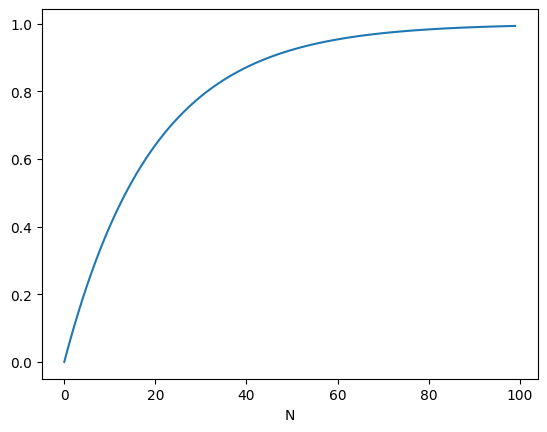

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

alpha = 0.05
N = np.arange(0,100)
plt.plot(N, 1-(1-alpha)**N)
plt.xlabel('N')
plt.ylabel('')


In [ ]:
#The simplest way to correct for Type I errors (false positives) in multiple comparisons is to divide  by the number of comparisons,
#Bonferroni correction
#his is a very conservative test that is typically used when the number of comparisons is relatively small and you want to avoid Type I errors.


In [ ]:
#Benjamini–Hochberg procedure
#1. Rank the individual p-values in ascending order, labeled i=1...n

#2. For each p-value, calculate its "critical value" as (i/n)Q, where i is the
#rank, n is the total number of tests, and Q is the false discovery rate
#(a percentage) that you choose (typically 0.05).

#3. In your rank-ordered, original p-values, find the largest value that is
#smaller than its associated critical value; this p-value is the new criterion
#(i.e., reject  for all cases for which p ≤ this value).


In [ ]:
#First, simulate multiple (say, 1000) t-tests comparing two samples with equal
#means and standard deviations, and save the p-values. Obviously, at p<0.05 we
#expect that ~5% of the simulations to yield a "statistically significant"
#result (of rejecting the NULL hypothesis that the samples come from
#distributions with equal means).

In [96]:
#python code to get two samples with same mean and standard deviation (from chat gpt)
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
#saving p-values
p_values = []

# Sample size
n = 10

# Generate random samples
sample1 = np.random.randn(n)  # Standard normal distribution
mean1 = np.mean(sample1)
std1 = np.std(sample1)
sample2 = np.random.randn(n)
mean2 = np.mean(sample1)
std2 = np.std(sample1)


# Verify
print("Sample 1:", sample1)
print("Sample 2:", sample2)
print("\nMeans:", np.mean(sample1), np.mean(sample2_transformed))
print("Standard Deviations:", np.std(sample1), np.std(sample2_transformed))

#Run a t-test on these two smaple
# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(sample1, sample2_transformed)

print("t-statistic:", t_stat)
print("p-value:", p_value)



Sample 1: [-0.33518624 -0.03825392  0.81873449 -0.33313868  0.2624833   0.2472264
  0.80688585  0.42814684 -0.38143365  0.09689445]
Sample 2: [ 0.34285017 -0.81290723  1.26936355  0.43878903  0.43505043 -2.29993491
  1.50146048  0.49425757  1.83865417 -0.07798007]

Means: 0.157235884880246 0.44806111169875623
Standard Deviations: 0.42037632257986374 0.6859059302944952
t-statistic: -1.0845253640317487
p-value: 0.2924449086084191


Total tests run: 1000
Significant results (p < 0.05): 52
Proportion of significant results: 5.20%


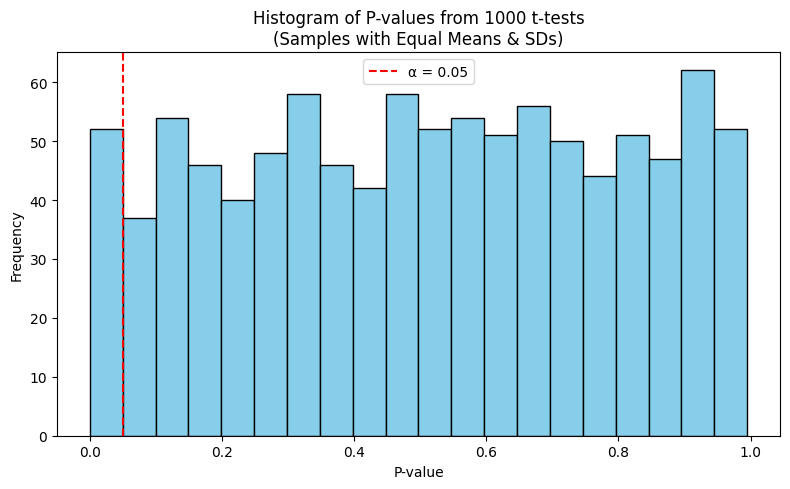

In [107]:
#tried to do it on my own, but things were just going wrong and I didn't know
#why. Very frustatring so this whole thing si from chatgtp.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# --- Parameters ---
num_tests = 1000       # Number of simulated t-tests
sample_size = 10       # Size of each sample
alpha = 0.05           # Significance level

# --- Simulate t-tests ---
p_values = []
for _ in range(num_tests):
    # Generate two samples from the same distribution (mean=0, std=1)
    sample1 = np.random.normal(0, 1, sample_size)
    sample2 = np.random.normal(0, 1, sample_size)

    # Two-sample independent t-test
    _, p = ttest_ind(sample1, sample2)
    p_values.append(p)

p_values = np.array(p_values)

# --- Count significant results ---
num_significant = np.sum(p_values < alpha)
percent_significant = 100 * num_significant / num_tests

# --- Output summary ---
print(f"Total tests run: {num_tests}")
print(f"Significant results (p < {alpha}): {num_significant}")
print(f"Proportion of significant results: {percent_significant:.2f}%")

# --- Plot histogram of p-values ---
plt.figure(figsize=(8, 5))
plt.hist(p_values, bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=alpha, color='red', linestyle='--', label=f'α = {alpha}')
plt.title('Histogram of P-values from 1000 t-tests\n(Samples with Equal Means & SDs)')
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()



#Benjamini–Hochberg procedure



In [79]:
#Second, once you have the simulated p-values, apply both methods to address
#the multiple comparisons problem.



Total tests run: 1000
Significant results (p < 0.05): 1
Proportion of significant results: 0.10%


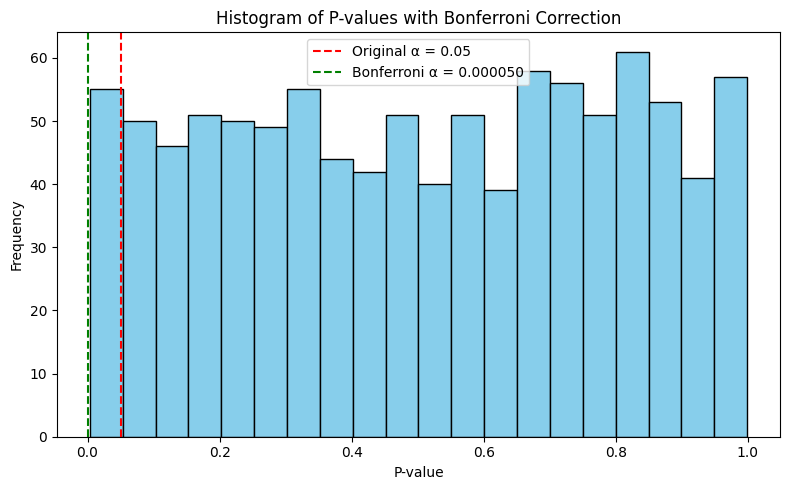

In [108]:
#Bonferroni correction
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# --- Parameters ---
num_tests = 1000       # Number of simulated t-tests
sample_size = 10       # Size of each sample
alpha = 0.05           # Significance level

# --- Simulate t-tests ---
p_values = []
for _ in range(num_tests):
    # Generate two samples from the same distribution (mean=0, std=1)
    sample1 = np.random.normal(0, 1, sample_size)
    sample2 = np.random.normal(0, 1, sample_size)

    # Two-sample independent t-test
    _, p = ttest_ind(sample1, sample2)
    p_values.append(p)

p_values = np.array(p_values)

# --- Count significant results ---
num_significant = np.sum(alpha_bonferroni < alpha)
percent_significant = 100 * num_significant / num_tests

# --- Output summary ---
print(f"Total tests run: {num_tests}")
print(f"Significant results (p < {alpha}): {num_significant}")
print(f"Proportion of significant results: {percent_significant:.2f}%")




# --- Plot histogram of p-values ---
plt.figure(figsize=(8, 5))
plt.hist(p_values, bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=alpha, color='red', linestyle='--', label=f'Original α = {alpha}')
plt.axvline(x=alpha_bonferroni, color='green', linestyle='--', label=f'Bonferroni α = {alpha_bonferroni:.6f}')
plt.title('Histogram of P-values with Bonferroni Correction')
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()








Total tests run: 1000
Significant results (p < 0.05): 0
Proportion of significant results: 0.00%
Original α = 0.05
Significant results after BH correction: 0/1000


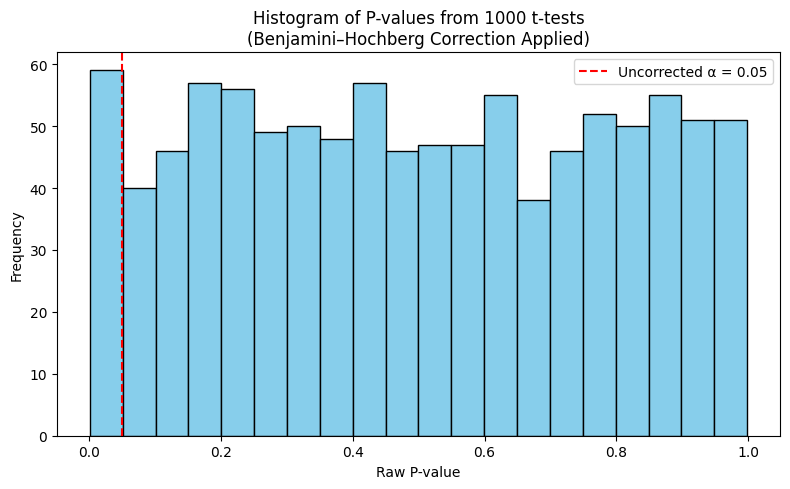

In [113]:
#Benjamini–Hochberg procedure

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

# --- Parameters ---
num_tests = 1000
sample_size = 10
alpha = 0.05

# --- Simulate t-tests ---
p_values = []
for _ in range(num_tests):
    sample1 = np.random.normal(0, 1, sample_size)
    sample2 = np.random.normal(0, 1, sample_size)
    _, p = ttest_ind(sample1, sample2)
    p_values.append(p)

p_values = np.array(p_values)

# --- Apply Benjamini-Hochberg (FDR) correction ---
rejects, pvals_corrected, _, _ = multipletests(p_values, alpha=alpha, method='fdr_bh')

# Count significant results after BH correction
num_significant_bh = np.sum(rejects)


# --- Count significant results ---
num_significant = np.sum(pvals_corrected < alpha)
percent_significant = 100 * num_significant / num_tests

# --- Output summary ---
print(f"Total tests run: {num_tests}")
print(f"Significant results (p < {alpha}): {num_significant}")
print(f"Proportion of significant results: {percent_significant:.2f}%")
# --- Output summary ---
print(f"Original α = {alpha}")
print(f"Significant results after BH correction: {num_significant_bh}/{num_tests}")

# --- Plot histogram of raw p-values ---
plt.figure(figsize=(8, 5))
plt.hist(p_values, bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=alpha, color='red', linestyle='--', label='Uncorrected α = 0.05')
plt.title('Histogram of P-values from 1000 t-tests\n(Benjamini–Hochberg Correction Applied)')
plt.xlabel('Raw P-value')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

Benjamini–Hochberg FDR (Q): 0.05
Significant results after BH correction: 0/1000
No p-values passed the BH threshold.


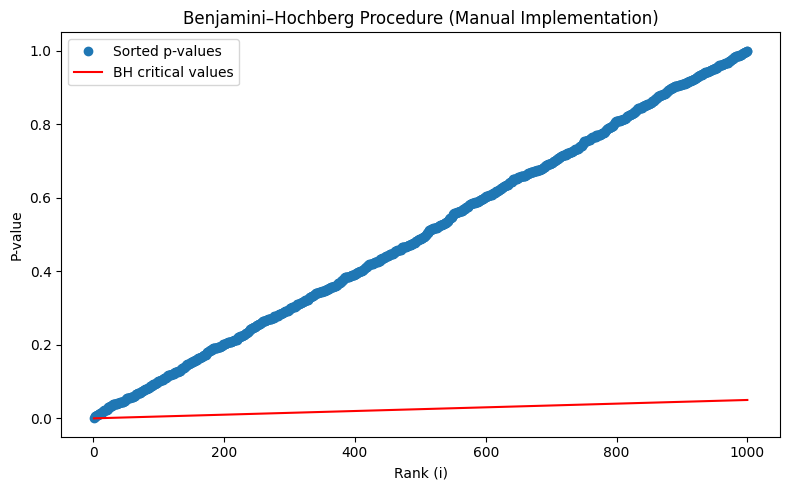

In [112]:
#this is how to do it step by step
#no idea what it really means, this was very confusing for me

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# --- Parameters ---
num_tests = 1000
sample_size = 10
Q = 0.05  # False discovery rate threshold
np.random.seed(42)

# --- Simulate t-tests ---
p_values = []
for _ in range(num_tests):
    sample1 = np.random.normal(0, 1, sample_size)
    sample2 = np.random.normal(0, 1, sample_size)
    _, p = ttest_ind(sample1, sample2)
    p_values.append(p)

p_values = np.array(p_values)

# --- Benjamini–Hochberg procedure manually ---

# Step 1: Rank p-values and keep track of original indices
sorted_indices = np.argsort(p_values)
sorted_pvals = p_values[sorted_indices]
ranks = np.arange(1, num_tests + 1)

# Step 2: Calculate BH critical values
critical_values = (ranks / num_tests) * Q

# Step 3: Find the largest p-value <= its critical value
below_threshold = sorted_pvals <= critical_values
if np.any(below_threshold):
    max_index = np.max(np.where(below_threshold)[0])
    p_threshold = sorted_pvals[max_index]
    num_rejects = max_index + 1  # +1 because index starts from 0
else:
    p_threshold = None
    num_rejects = 0

# --- Report results ---
print(f"Benjamini–Hochberg FDR (Q): {Q}")
print(f"Significant results after BH correction: {num_rejects}/{num_tests}")
if p_threshold:
    print(f"Reject all p-values ≤ {p_threshold:.6f}")
else:
    print("No p-values passed the BH threshold.")

# --- Optional: Plot ---
plt.figure(figsize=(8, 5))
plt.plot(ranks, sorted_pvals, marker='o', linestyle='', label='Sorted p-values')
plt.plot(ranks, critical_values, color='red', label='BH critical values')
if p_threshold:
    plt.axhline(y=p_threshold, color='green', linestyle='--', label=f'BH threshold = {p_threshold:.4f}')
plt.xlabel('Rank (i)')
plt.ylabel('P-value')
plt.title('Benjamini–Hochberg Procedure (Manual Implementation)')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#Third, set the sample 1 and sample 2 means to be 1 and 2 respectively,
#and re-run the exercise. What do you notice? What if you make the
#difference between means even greater?


Means: sample1 = 1, sample2 = 2
Bonferroni α = 0.000050
Significant results (Bonferroni): 10 / 1000
Significant results (Benjamini-Hochberg): 445 / 1000
BH rejection threshold p ≤ 0.022052


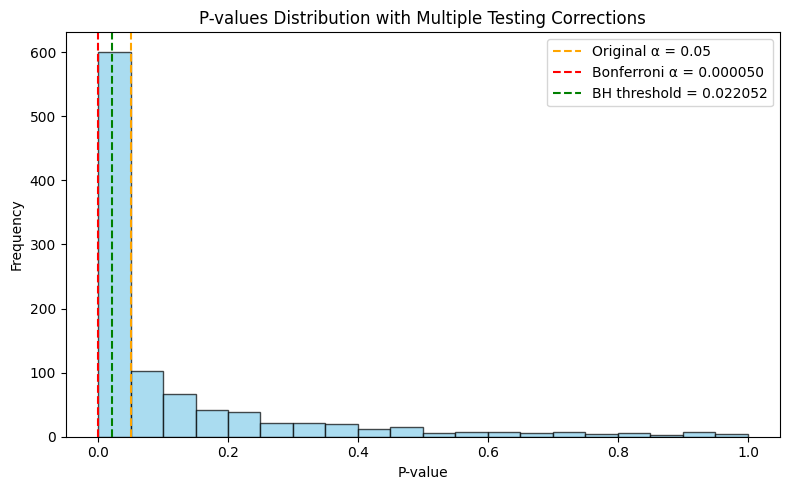

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# --- Parameters ---
num_tests = 1000
sample_size = 10
alpha = 0.05
mean1 = 1
mean2 = 2  # Change this to increase difference
np.random.seed

# --- Simulate t-tests ---
p_values = []
for _ in range(num_tests):
    sample1 = np.random.normal(loc=mean1, scale=1, size=sample_size)
    sample2 = np.random.normal(loc=mean2, scale=1, size=sample_size)
    _, p = ttest_ind(sample1, sample2)
    p_values.append(p)

p_values = np.array(p_values)

# --- Bonferroni correction ---
alpha_bonferroni = alpha / num_tests
significant_bonferroni = np.sum(p_values < alpha_bonferroni)

# --- Benjamini-Hochberg (manual) ---
sorted_indices = np.argsort(p_values)
sorted_pvals = p_values[sorted_indices]
ranks = np.arange(1, num_tests + 1)
critical_values = (ranks / num_tests) * alpha
below_threshold = sorted_pvals <= critical_values

if np.any(below_threshold):
    max_index = np.max(np.where(below_threshold)[0])
    p_threshold_bh = sorted_pvals[max_index]
    num_rejects_bh = max_index + 1
else:
    p_threshold_bh = None
    num_rejects_bh = 0

# --- Print summary ---
print(f"Means: sample1 = {mean1}, sample2 = {mean2}")
print(f"Bonferroni α = {alpha_bonferroni:.6f}")
print(f"Significant results (Bonferroni): {significant_bonferroni} / {num_tests}")
print(f"Significant results (Benjamini-Hochberg): {num_rejects_bh} / {num_tests}")
if p_threshold_bh:
    print(f"BH rejection threshold p ≤ {p_threshold_bh:.6f}")
else:
    print("No p-values passed the BH threshold.")

# --- Plot histogram with thresholds ---
plt.figure(figsize=(8, 5))
plt.hist(p_values, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=alpha, color='orange', linestyle='--', label='Original α = 0.05')
plt.axvline(x=alpha_bonferroni, color='red', linestyle='--', label=f'Bonferroni α = {alpha_bonferroni:.6f}')
if p_threshold_bh:
    plt.axvline(x=p_threshold_bh, color='green', linestyle='--', label=f'BH threshold = {p_threshold_bh:.6f}')
plt.title('P-values Distribution with Multiple Testing Corrections')
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()



Means: sample1 = 1, sample2 = 3
Bonferroni α = 0.000050
Significant results (Bonferroni): 300 / 1000
Significant results (Benjamini-Hochberg): 990 / 1000
BH rejection threshold p ≤ 0.044145


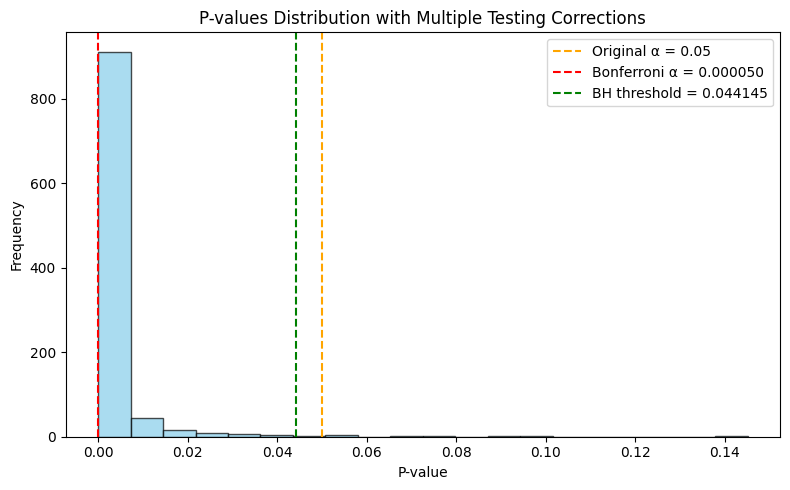

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# --- Parameters ---
num_tests = 1000
sample_size = 10
alpha = 0.05
mean1 = 1
mean2 = 3  # Change this to increase difference
np.random.seed

# --- Simulate t-tests ---
p_values = []
for _ in range(num_tests):
    sample1 = np.random.normal(loc=mean1, scale=1, size=sample_size)
    sample2 = np.random.normal(loc=mean2, scale=1, size=sample_size)
    _, p = ttest_ind(sample1, sample2)
    p_values.append(p)

p_values = np.array(p_values)

# --- Bonferroni correction ---
alpha_bonferroni = alpha / num_tests
significant_bonferroni = np.sum(p_values < alpha_bonferroni)

# --- Benjamini-Hochberg (manual) ---
sorted_indices = np.argsort(p_values)
sorted_pvals = p_values[sorted_indices]
ranks = np.arange(1, num_tests + 1)
critical_values = (ranks / num_tests) * alpha
below_threshold = sorted_pvals <= critical_values

if np.any(below_threshold):
    max_index = np.max(np.where(below_threshold)[0])
    p_threshold_bh = sorted_pvals[max_index]
    num_rejects_bh = max_index + 1
else:
    p_threshold_bh = None
    num_rejects_bh = 0

# --- Print summary ---
print(f"Means: sample1 = {mean1}, sample2 = {mean2}")
print(f"Bonferroni α = {alpha_bonferroni:.6f}")
print(f"Significant results (Bonferroni): {significant_bonferroni} / {num_tests}")
print(f"Significant results (Benjamini-Hochberg): {num_rejects_bh} / {num_tests}")
if p_threshold_bh:
    print(f"BH rejection threshold p ≤ {p_threshold_bh:.6f}")
else:
    print("No p-values passed the BH threshold.")

# --- Plot histogram with thresholds ---
plt.figure(figsize=(8, 5))
plt.hist(p_values, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=alpha, color='orange', linestyle='--', label='Original α = 0.05')
plt.axvline(x=alpha_bonferroni, color='red', linestyle='--', label=f'Bonferroni α = {alpha_bonferroni:.6f}')
if p_threshold_bh:
    plt.axvline(x=p_threshold_bh, color='green', linestyle='--', label=f'BH threshold = {p_threshold_bh:.6f}')
plt.title('P-values Distribution with Multiple Testing Corrections')
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()